In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Delhi House Prediction.csv")
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [5]:
data.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [8]:
data.shape

(1259, 11)

In [9]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [10]:
import missingno

In [17]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

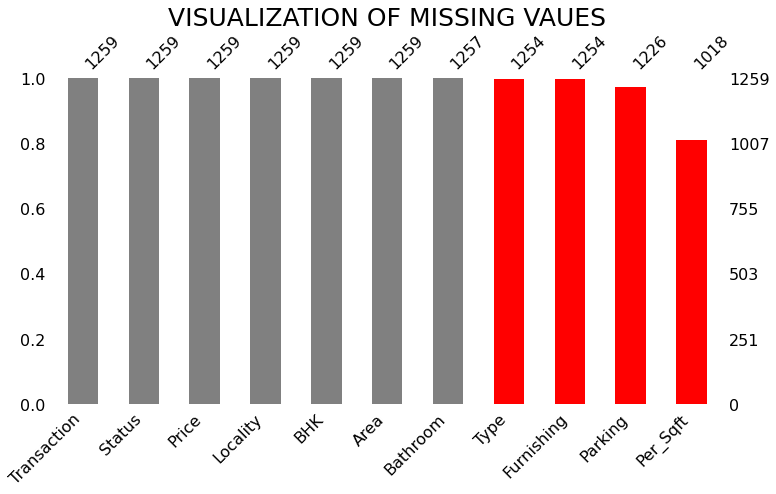

In [19]:
color = ['grey','grey','grey','grey','grey','grey','grey','red','red','red','red']
missingno.bar(data,fontsize =16, color = color, sort = 'descending', figsize = (12,6))
plt.title("VISUALIZATION OF MISSING VAUES",fontsize=25)
plt.show()

In [20]:
data=data.dropna(axis=0)

In [22]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [36]:
data1=['Area','BHK','Parking','Per_Sqft']
X=data[data1]

In [37]:
X.head()

,Area,BHK,Parking,Per_Sqft
1,750.0,2,1.0,6667.0
2,950.0,2,1.0,6667.0
3,600.0,2,1.0,6667.0
4,650.0,2,1.0,6667.0
5,1300.0,4,1.0,6667.0


In [42]:
X.describe()

,Area,BHK,Parking,Per_Sqft
count,1005.000000,1005.000000,1005.000000,1005.000000
mean,1504.301968,2.791045,1.697512,15663.630846
std,1729.104830,0.961469,3.223118,21170.160448
min,28.000000,1.000000,1.000000,1259.000000
25%,770.000000,2.000000,1.000000,6364.000000
50%,1150.000000,3.000000,1.000000,11363.000000
75%,1700.000000,3.000000,2.000000,18000.000000
max,24300.000000,7.000000,39.000000,183333.000000


In [41]:
y=data['Price']
y.head()

1     5000000
2    15500000
3     4200000
4     6200000
5    15500000
Name: Price, dtype: int64

# Build The Model

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

D:\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [47]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(classifier.predict(X.head()))

Making predictions for the following 5 houses:
     Area  BHK  Parking  Per_Sqft
1   750.0    2      1.0    6667.0
2   950.0    2      1.0    6667.0
3   600.0    2      1.0    6667.0
4   650.0    2      1.0    6667.0
5  1300.0    4      1.0    6667.0
The predictions are
[70000000 70000000 70000000 70000000 27500000]
